In [17]:
import numpy as np
import pandas as pd
df_ner = pd.read_csv("./entity-annotated-corpus/ner.csv", error_bad_lines=False, encoding = "ISO-8859-1")
df_ner.dropna(inplace=True)

b'Skipping line 281837: expected 25 fields, saw 34\n'


a

Porque la columna word presenta las palabras las palabras completas, incluida la conjugación. Mientras que la columna lemma presenta la raiz de la palabra.

In [6]:
df_ner

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
0,0,thousand,of,demonstr,NNS,lowercase,demonstrators,IN,lowercase,of,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,1.0,capitalized,Thousands,O
1,1,of,demonstr,have,VBP,lowercase,have,NNS,lowercase,demonstrators,...,__start1__,__START1__,wildcard,__START1__,capitalized,Thousands,1.0,lowercase,of,O
2,2,demonstr,have,march,VBN,lowercase,marched,VBP,lowercase,have,...,thousand,NNS,capitalized,Thousands,lowercase,of,1.0,lowercase,demonstrators,O
3,3,have,march,through,IN,lowercase,through,VBN,lowercase,marched,...,of,IN,lowercase,of,lowercase,demonstrators,1.0,lowercase,have,O
4,4,march,through,london,NNP,capitalized,London,IN,lowercase,through,...,demonstr,NNS,lowercase,demonstrators,lowercase,have,1.0,lowercase,marched,O
5,5,through,london,to,TO,lowercase,to,NNP,capitalized,London,...,have,VBP,lowercase,have,lowercase,marched,1.0,lowercase,through,O
6,6,london,to,protest,VB,lowercase,protest,TO,lowercase,to,...,march,VBN,lowercase,marched,lowercase,through,1.0,capitalized,London,B-geo
7,7,to,protest,the,DT,lowercase,the,VB,lowercase,protest,...,through,IN,lowercase,through,capitalized,London,1.0,lowercase,to,O
8,8,protest,the,war,NN,lowercase,war,DT,lowercase,the,...,london,NNP,capitalized,London,lowercase,to,1.0,lowercase,protest,O
9,9,the,war,in,IN,lowercase,in,NN,lowercase,war,...,to,TO,lowercase,to,lowercase,protest,1.0,lowercase,the,O



Los datasets presentan dimensiones indeterminadas, en el sentido que se conforman de 48081 arreglos de largos distintos debido a que las frases obviamente tienen distintos largos.

In [18]:
dataset = df_ner.loc[:,["lemma","pos","tag","prev-iob"]]

sentence = []
labels_sentence = []
dataX,dataY = [],[]
#uniques
lemmas,labels = set(), set()
for fila in dataset.values:
    if fila[-1]=="__START1__": 
        dataX.append(np.asarray(sentence))
        dataY.append(np.asarray(labels_sentence))
        sentence= []
        labels_sentence = []
    lemmas.add(fila[0])
    labels.add(fila[1])
    sentence.append(fila[0])#add lemma
    labels_sentence.append(fila[1]) #POS o TAG
#data to  array
dataX = np.asarray(dataX[1:])
dataY = np.asarray(dataY[1:])

In [21]:
print("dataX : ", dataX.shape)
print("dataY : ", dataY.shape)
print("lemmas : ", len(lemmas))
print("labels : ", len(labels))
print("sentence : ", len(sentence))
print("labels_sentence : ", len(labels_sentence))

dataX :  (48081,)
dataY :  (48081,)
lemmas :  20243
labels :  41
sentence :  8
labels_sentence :  8


b

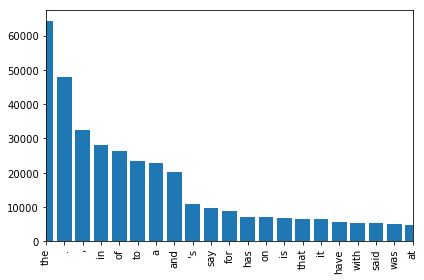

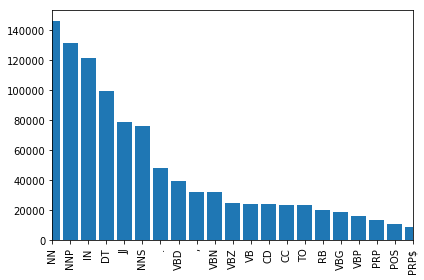

In [19]:

import matplotlib.pyplot as plt
from scipy import special
from collections import Counter
%matplotlib inline



def grafico(dataset):
    freq = {}

    for sentence in dataset:
        for word in sentence:
            count = freq.get(word,0)
            freq[word] = count + 1




    data = Counter(freq)    
    xaxis = range(len(data))
    #xaxis = range(100)

    keys_freq = []
    values_freq = []

    keys_length = []
    values_length = []

    # Rank depending on frequency
    for key, value in data.most_common():
        keys_freq.append(key)
        values_freq.append(value)

    # Rank depending on word length
    for key in sorted(data.keys(), key=lambda x: (len(x), x)):
        keys_length.append(key)
        values_length.append(data[key])

    fig = plt.figure()

    #plt.subplot(211)
    plt.bar(xaxis, values_freq, align='center')
    plt.xticks(xaxis, keys_freq)
    locs, plt_labels = plt.xticks()
    plt.setp(plt_labels, rotation=90)
    plt.xlim(0, 20)

    #plt.subplot(212)
    #plt.bar(xaxis, values_length, align='center')
    #plt.xticks(xaxis, keys_length)
    #locs, labels = plt.xticks()
    #plt.setp(labels, rotation=90)
    #plt.xlim(0, 20)

    fig.tight_layout()
    plt.show()
    

grafico(dataX)
grafico(dataY)

c

In [23]:
#add fullfill lemma and tag to the dictionary
lemma2idx = {w: i for i, w in enumerate(lemmas)} #Converting text to numbers

lab2idx = {t: i for i, t in enumerate(labels)}
aux_dataX = [[lemma2idx[lemma] for lemma in sentence ] for sentence in dataX]
aux_dataY = [[lab2idx[pos] for pos in pos_tags ] for pos_tags in dataY]
n_lemmas = len(lemmas)
n_labels = len(labels)

d

In [41]:
from keras.preprocessing import sequence

max_input_lenght = len(max(aux_dataY,key=len))
X = sequence.pad_sequences(aux_dataX,maxlen=max_input_lenght,padding='pre',value= 0) 
y = sequence.pad_sequences(aux_dataY,maxlen=max_input_lenght,padding='pre',value= 0)

e  
Las dimensiones de los sets son iguales que al crearlos, con la diferencia que la segunda dimensión ahora si está definida, ya que se estableció un largo estandar para cada fila.

In [42]:
from keras.utils import to_categorical


y = np.asarray([to_categorical(i, num_classes=n_labels) for i in y])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=22)

f

In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
embedding_vector = 32
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=128, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 81, 32)            647776    
_________________________________________________________________
lstm_3 (LSTM)                (None, 81, 100)           53200     
_________________________________________________________________
dense_3 (Dense)              (None, 81, 41)            4141      
Total params: 705,117
Trainable params: 705,117
Non-trainable params: 0
_________________________________________________________________


/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


g  
Se observa que al aumentar la dimensión de embedding el loss de la evaluación del modelo baja.

In [45]:
embedding_vector = 48
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=128, verbose = 0)
scores_48 = model.evaluate(X_test, y_test, verbose=0)

print("Loss: ", scores_48[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 81, 48)            971664    
_________________________________________________________________
lstm_4 (LSTM)                (None, 81, 100)           59600     
_________________________________________________________________
dense_4 (Dense)              (None, 81, 41)            4141      
Total params: 1,035,405
Trainable params: 1,035,405
Non-trainable params: 0
_________________________________________________________________


/Users/alonsoisrael/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Loss:  0.121257726223


In [47]:
embedding_vector = 16
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=128, verbose = 0)
scores_48 = model.evaluate(X_test, y_test, verbose=0)

print("Loss: ", scores_48[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 81, 16)            323888    
_________________________________________________________________
lstm_6 (LSTM)                (None, 81, 100)           46800     
_________________________________________________________________
dense_6 (Dense)              (None, 81, 41)            4141      
Total params: 374,829
Trainable params: 374,829
Non-trainable params: 0
_________________________________________________________________
Loss:  0.273083352937


h  
Al comparar el desempeño con dimension de embedding 48 se observa que el loss es muy similar, sin embargo la precisión aumenta en un 4%.

In [49]:
from keras.layers import Dropout

embedding_vector = 48
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
model.add(LSTM(units=100,return_sequences=True)) #or recurrent_dropout=0.2
model.add(Dropout(0.2))
model.add(Dense(n_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=128, verbose=0)

scores_h = model.evaluate(X_test, y_test, verbose=0)
print("Loss: ", scores_h[0])

Loss:  0.126113505654


In [52]:
print("Acc con dropout: ", scores_h[1])
print("Acc sin dropout: ", scores_48[1])

Acc con dropout:  0.963782870451
Acc sin dropout:  0.922267155127


i  
Se tiene que ambas métricas mejoran al usar una LSTM bidireccional, esto se debe a que al tener información de las palabras que acompañan a otra por ambos lados se puede aprender mucho mas acerca del uso de esta.

In [55]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
layer_lstm = LSTM(units=100,return_sequences=True)
model.add(Bidirectional(layer_lstm,merge_mode='sum')) # 'sum', 'mul', 'concat', 'ave', None
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=128, verbose=0)

scores_i = model.evaluate(X_test, y_test, verbose=0)
print("Loss: ", scores_i[0])
print("Acc: ", scores_i[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 81, 48)            971664    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 81, 100)           119200    
_________________________________________________________________
dense_11 (Dense)             (None, 81, 41)            4141      
Total params: 1,095,005
Trainable params: 1,095,005
Non-trainable params: 0
_________________________________________________________________
Loss:  0.0882066067144
Acc:  0.973091984692


j

In [73]:
i = 162

p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
aux_lemmas = list(lemmas)
aux_labels = list(labels)

print("{:15}: {}".format("Lemma", "Pred"))
for w,pred in zip(X_test[i],p[0]):
    #print("{:15}: {}".format(lemmas[w],labels[pred]))
    print("lemmas: ",aux_lemmas[w],"-    labels: ",aux_labels[pred])

Lemma          : Pred
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuka -    labels:  NNPS
lemmas:  yokosuk

k

In [2]:
dataset = df_ner.loc[:,["word","lemma"]]
text = ' '.join(dataset["word"]).lower() #corpus
null_character = "*"
chars = [null_character]+sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = {c: i for i, c in enumerate(chars)}
indices_char = {i: c for i, c in enumerate(chars)}
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 5 
sentences = []
next_chars = []
size = int(len(text)*0.2) #solo un 20% del corpus
for i in range(0, size - maxlen, step):
    sentences.append(null_character+text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

total chars: 72
nb sequences: 242693


l

In [3]:
from keras.utils import to_categorical
from keras.preprocessing import sequence

dataX_l = [[char_indices[char] for char in sentence ] for sentence in sentences]
dataY_l = [char_indices[char] for char in next_chars]


max_input_lenght = len(max(dataX_l,key=len))
X = sequence.pad_sequences(dataX_l,maxlen=max_input_lenght,padding='pre',value= 9999) #dataX pad sequence padding='pre'
#y = sequence.pad_sequences(dataY_l,maxlen=max_input_lenght,padding='pre',value= '*') #dataY to categorical with num_classes=len(chars)
y = np.asarray([to_categorical(i, num_classes=len(chars)) for i in dataY_l])

Using TensorFlow backend.


In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
from keras.layers import CuDNNGRU,GRU
embedding_vector = 16
model = Sequential()
model.add(Embedding(input_dim=len(chars), output_dim=embedding_vector, input_length=maxlen+1))#
model.add(GRU(units=512,return_sequences=False)) #or CuDNNGRU
model.add(Dropout(0.2))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


m

In [15]:
def predict_next_char(model, sentence, diversity=1.0):
    """Predict the next character from the current one"""    
    x_pred = [char_indices[null_character]]+[char_indices[char] for char in sentence]
    x_pred = sequence.pad_sequences([x_pred], maxlen=maxlen+1,padding='pre',value=char_indices[null_character])
    preds = model.predict(x_pred, verbose=0)[0]
    next_index = np.random.choice(len(chars), p=preds)
    return indices_char[next_index]
import random,sys
def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print('\n----- Generating text after Epoch: %d' % epoch)
    start_index = random.randint(0, size - maxlen - 1)
    sentence = text[start_index: start_index + maxlen]
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(sentence)
    for i in range(400):
        next_char = predict_next_char(model, sentence0)
        sentence = sentence[1:] + next_char #for next character
        sys.stdout.write(next_char)
        sys.stdout.flush()
    return

from keras.callbacks import LambdaCallback
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)
model.fit(X, y,batch_size=256,epochs=25, callbacks=[print_callback])

Epoch 1/25  
242693/242693 [==============================] - 100s 412us/step - loss: 2.0113 - acc: 0.4046

----- Generating text after Epoch: 0  
----- Generating with seed: "g a plant in the country . the world hea"  
g a plant in the country . the world headed read f enesticien saysmate say tish bo inch the the re in ce1n/ werva in aug-constrecp es le detalking vitig and for the muno has depternitex , naza inde on or . ovenonews sousedes rebo tahhast , a kientrest of mas bumid 's burints say there dayf kashs y algomo whin aution , inal  .ntwe warbon ) mef comcing eruedows on nit waiternieaweds . erectom in the borning takkrat bountry carmad in the e  

  
  
Epoch 16/25  
242693/242693 [==============================] - 100s 412us/step - loss: 0.8766 - acc: 0.7256  

----- Generating text after Epoch: 15  
----- Generating with seed: "arges as part of a plea bargain , but a "  
arges as part of a plea bargain , but a hel pent between in a septan 's new plunt of mary kithin 1 , continued by the ansists the summit on her lound whene charge to ached the past the the international wanted were no chief porton hause to ex-804 police officers for financial years agrees hampucalipers aga say al-jadeque daying atsall his venifled with a migitary been delice sabeline killed an abthority in juinco vatin am zexiclan asdic    
 
  
  
Epoch 25/25  
242693/242693 [==============================] - 99s 409us/step - loss: 0.7863 - acc: 0.7509  

----- Generating text after Epoch: 24  
----- Generating with seed: "hington . the vice president is an avid "  
hington . the vice president is an avid grombian police leader 's adming at least 62 people and ismail 's fairing the death of a campaign adaita harficers have bareed representatives has resumed membirs . in a after of ppbest in maycouting police say a report about the day , fighting india and plans to invalve the iffor the thools agreed to rey te tarbet dediears , and said the vilus , dunisg 31 outbrians seoran government adver aggacls

n

In [ ]:
sentence = "he invasion was preceded by an airstrike on th"
print('----- Generating with seed: "' + sentence + '"')
sys.stdout.write(sentence)
for i in range(400):
    next_char = predict_next_char(model, sentence)
    sentence = sentence[1:] + next_char 
    sys.stdout.write(next_char)
    sys.stdout.flush()

----- Generating with seed: "he invasion was preceded by an airstrike on th"  

he invasion was preceded by an airstrike on the internet over one court bush take arrised a pope , russian near the workd of the reduca of a sepion released and service his appriction relations . why the united nations had the deally about . insurgents shipting the islands . deployed and mastaces in accust of many op pakistan , and mosnuin has visted . belining aldoun men ween in a taliban militant taleban insurgent groups and voce ifleg pris